In [1]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
DATA_DIR = '/home/nas/data/YMG/datas/celeba_hq_256/'
# --- 모델 경로 ---
AE_CHECKPOINT_DIR = '/home/nas/data/YMG/superdeep_ae/checkpoints/'

ENCODER_PATH = os.path.join(AE_CHECKPOINT_DIR, 'encoder_superdeep_best.pth')

In [3]:
# --- 데이터 로드 (상위 5개) ---
image_files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith('.jpg')])[:5]
image_paths = [os.path.join(DATA_DIR, fname) for fname in image_files]

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

images_tensors = [transform(Image.open(p)) for p in image_paths]
print(f"{len(images_tensors)}개의 이미지를 텐서로 변환했습니다.")
print("이미지 텐서 shape:", images_tensors[0].shape)

5개의 이미지를 텐서로 변환했습니다.
이미지 텐서 shape: torch.Size([3, 256, 256])


In [4]:
image_files

['00000.jpg', '00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg']

In [5]:
image_paths

['/home/nas/data/YMG/datas/celeba_hq_256/00000.jpg',
 '/home/nas/data/YMG/datas/celeba_hq_256/00001.jpg',
 '/home/nas/data/YMG/datas/celeba_hq_256/00002.jpg',
 '/home/nas/data/YMG/datas/celeba_hq_256/00003.jpg',
 '/home/nas/data/YMG/datas/celeba_hq_256/00004.jpg']

In [6]:
transform

Compose(
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)

In [7]:
len(images_tensors)

5

In [8]:
np.shape(images_tensors[0])

torch.Size([3, 256, 256])

In [9]:
# --- 모델 정보 불러오기 ---
try:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    encoder_state_dict = torch.load(ENCODER_PATH, map_location=device)
    print(f"'{os.path.basename(ENCODER_PATH)}' 모델 로드 성공 (device: {device})")
    print("\n모델 레이어(Keys):")
    for key in list(encoder_state_dict.keys())[:10]: # 상위 10개 키만 출력
        print(f"- {key}")
except Exception as e:
    print(f"모델 로드 실패: {e}")

/tmp/ipykernel_2395807/3008410092.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder_state_dict = torch.load(ENCODER_PATH, map_location=device)


'encoder_superdeep_best.pth' 모델 로드 성공 (device: cuda)

모델 레이어(Keys):
- encoder.0.weight
- encoder.0.bias
- encoder.1.block.0.weight
- encoder.1.block.0.bias
- encoder.1.block.1.weight
- encoder.1.block.1.bias
- encoder.1.block.1.running_mean
- encoder.1.block.1.running_var
- encoder.1.block.1.num_batches_tracked
- encoder.1.block.3.weight


/home/a202192022/anaconda3/envs/GM-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/a202192022/anaconda3/envs/GM-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/a202192022/anaconda3/envs/GM-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/a202192022/anaconda3/envs/GM-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/a202192022/anaconda3/envs/GM-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:1

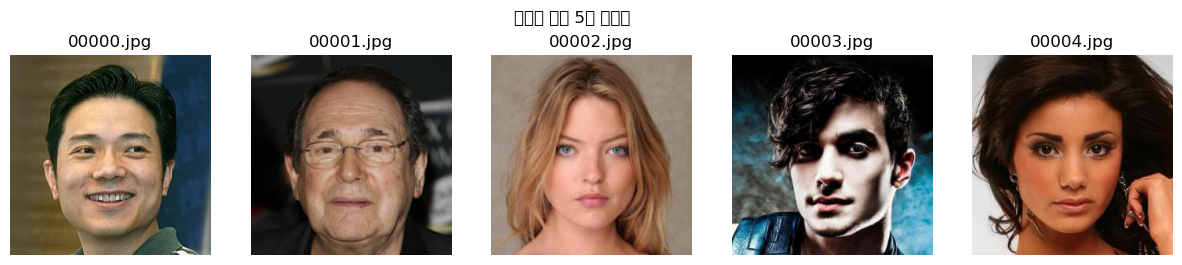

In [10]:
# --- 로드된 이미지 시각화 ---
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, tensor_img in enumerate(images_tensors):
    ax = axes[i]
    # PyTorch 텐서 (C, H, W) -> Matplotlib (H, W, C)
    ax.imshow(tensor_img.permute(1, 2, 0))
    ax.set_title(image_files[i])
    ax.axis('off')
plt.suptitle('로드된 상위 5개 이미지')
plt.show()